In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.stats import ttest_ind, ttest_rel
import statsmodels.api as smi
from scipy.special import ndtri
from scipy.integrate import quad
from scipy.stats import t
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency

In [2]:
# Расстояние Пирсона. Распределение Хи-квадрат
O = np.array([20, 40])
E = np.array([30,30])

xi_2 = np.sum((O - E)**2/E) # расстояние Пирсона
print(round(xi_2,1))

6.7


In [3]:
# расчёт p-уровня значимости для хи-квадрат распределения
df = 1 # число степеней свободы
stats.chisquare(f_obs=(20,40), f_exp=(30,30))

Power_divergenceResult(statistic=np.float64(6.666666666666667), pvalue=np.float64(0.009823274507519235))

In [4]:
# Задача. Проверка нулевой гипотезы о равновероятном выпадении орла или решки
experiments = 10000
observations = 60
E = np.array([30,30])

In [5]:
import scipy.stats as sps

sps.contingency.expected_freq(([10, 6], [5, 15]))

array([[ 6.66666667,  9.33333333],
       [ 8.33333333, 11.66666667]])

In [6]:
xi_results = []
for _ in range(experiments):
    all_values = [np.random.randint(0,2) for _ in range(observations)] # выпадение орла или решки
    O = np.array([all_values.count(0),all_values.count(1)])
    xi_2 = np.sum((O - E)**2/E)
    xi_results.append(xi_2)

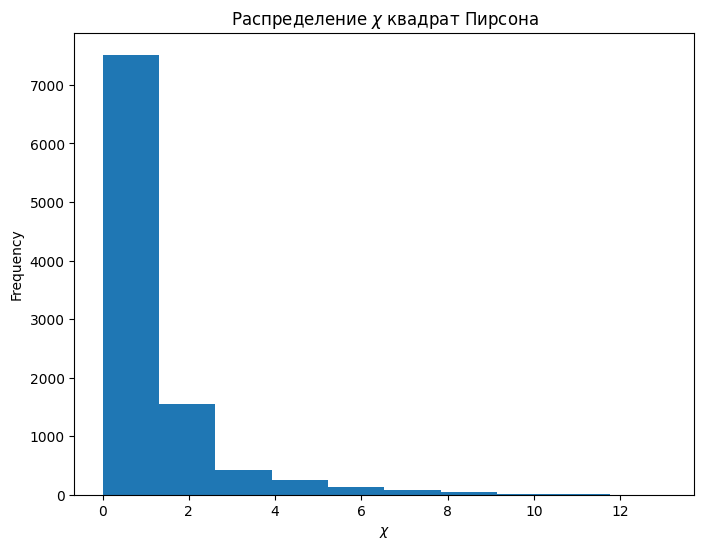

In [7]:
# Большиство значений находится вблизи нуля => орёл и решка работает верно.
fig, ax = plt.subplots(figsize = (8,6))
plt.title('Распределение $\chi$ квадрат Пирсона')
plt.xlabel('$\chi$')
plt.ylabel(f'Frequency')
plt.hist(xi_results);

In [26]:
# Таблица сопряженности - исследование взаимосвязи между переменными
# Ячейки таблицы содержат частоты совместного появления категорий.
# ручной расчёт
O1 = np.array([[20, 15],[11, 12], [7, 9]])
E1 = np.array([[17.97, 17.03],[11.81, 11.19], [8.22, 7.78]]) # ожидаемые значени по формуле f_ij = f_i*f_j/N

xi_2 = np.sum((O1 - E1)**2/E1) # расстояние Пирсона
print('Расстояние Пирсона = ', xi_2)

Расстояние Пирсона =  0.9578688876439141


In [27]:
import scipy.stats as sps

# ожидаемые значения можно вычислить также следующим образом
sps.contingency.expected_freq([[20, 15],[11, 12], [7, 9]])

array([[17.97297297, 17.02702703],
       [11.81081081, 11.18918919],
       [ 8.21621622,  7.78378378]])

In [28]:
table = [[20,15],[11,12],[7,9]] 


chi2, prob, df, expected = chi2_contingency(table) #рассчитываем параметры Хи-квадрат
print('Расстояние Пирсона = ', chi2)
print('Степень свободы df =', df)
print('p-уровень значимости =',prob)
print('Вывод: распределение не отличается от ожидаемого')

Расстояние Пирсона =  0.9544070774762996
Степень свободы df = 2
p-уровень значимости = 0.6205162173513055
Вывод: распределение не отличается от ожидаемого
